# Homework 2: RoboCup@Home Object Classification

This homework aims at solving an image classification problem with objects typically available in a home environment. To this end, we will use the 
[RoboCup@Home-Objects dataset](https://sites.google.com/diag.uniroma1.it/robocupathome-objects/home) that has been developed within the [RoboCup@Home](https://athome.robocup.org) competition.

Each student will solve a personalized 8-classes classification problem (as a subset of the entire dataset), depending on his/her matricola code.

To generate your dataset, follow these steps:

1) Duplicate this Colab and put your matricola number in the piece of code below (replacing the ERROR string)

2) Run the code and take note of the 8 printed labels 

3) Download the corresponding 8 ZIP files from this folder

https://drive.google.com/drive/folders/1dL4OZRPLahq6aSgWxk9efmFbfoy1Vp0I

4) Use images in these 8 ZIP files as dataset for your 8-classes image classification problem


In [ ]:
labels = {
  'containers': [ 'food_tray', 'glass_container', 'serving_tray', 'disposable_container', 'plastic_tray', 'grocery_bag', 'decorative_tray', 'reusable_bag', 'plastic_bag', 'paper_bag', 'food_banister', 'basket_container', 'glass_tray', 'colored_paper_bag', 'plastic_food_container', 'glass_food_container', 'plastic_container',  ],
  'tableware': [ 'pasta_bowl', 'teacup', 'snack_bowl', 'espresso_cup', 'accent_plate', 'beer_glasses', 'cereal_bowl', 'water_glasses', 'dessert_plate', 'soup_bowl', 'side_dish_plate', 'rice_bowl', 'salad_plate', 'salad_bowl', 'buillin_cup', 'fruit_plate', 'saucer_cup', 'coffee_mug', 'dessert_bowl', 'coffee_cup', 'dinner_plate', 'sushi_plate', 'wine_glasses',  ],
  'drinks': [ 'Cocoa_drink_bottle', 'juice_carton', 'Coffee_drink_bottle', 'Flavored_Water', 'Tonic_Water', 'Tea_drink_bottle', 'Sparkling_Water', 'Juice_bottle', 'Seltzer_Water', 'Mineral_Water', 'Sports_Drinking_Water', 'juice_box', 'Soft_Drink_can', 'iced_tea', 'Energy_Drink', 'chocolate_drink_bottle', 'soft_drink_bottle',  ],
  'cutlery': [ 'Knives', 'chopsticks', 'plastic_fork', 'carving_knife_fork', 'Forks', 'utensils', 'cake_server', 'butter_knives', 'plastic_spoon', 'dinnerware', 'plastic_knife', 'Sporks', 'steak_knives', 'Spoons', 'serveware',  ],
  'fruits': [ 'Bananas', 'Oranges', 'Cranberries', 'Nectarines', 'Plums', 'Grapes', 'Grapefruit', 'Papayas', 'Peaches', 'Raspberries', 'Strawberries', 'Pears', 'Pineapple', 'Lemons', 'Blueberries', 'Tangerines', 'Mangos', 'Figs', 'Cherries', 'Melons', 'Apricots', 'Mixed', 'Apples',  ],
  'snacks': [ 'Mints_bag', 'Fruit_Snacks', 'Vegetable_Chips_&_Crisps', 'Marshmallows_bag', 'bubble_gum_brand', 'Cookies', 'Sour_Candy_bag', 'Hard_Candy_snacks', 'potato_Crisps', 'Candy_Bars', 'snacks_Seeds', 'Pretzels', 'Chewing_Gum_brand', 'Jelly_Beans_bag', 'potato_chips_pringles', 'Assorted_Snack_Cookies', 'Lollipops', 'Breadsticks', 'Gummy_Candy_bag', 'Potato_Chips_bag', 'Fruit_Cups', 'Puffed_Snacks', 'Nuts_snacks', 'Crackers', 'Party_Mix_snack', 'Popcorn',  ],
  'food': [ 'Olives_jar', 'pasta_sides', 'rice_sides', 'jarred_vegetables', 'Muesli_box', 'instant_ramen_noodles', 'canned_sardines', 'pickled_vegetables', 'Packaged_Bread', 'Oatmeal_box', 'noodle_soup_cup', 'Fruit_Butters', 'canned_tuna', 'Jams', 'Nut_&_Seed_Butter', 'Honey', 'canned_vegetables', 'Marmalades', 'Cereals_box', 'canned_soup', 'instant_Soup', 'Macaroni_&_Cheese_box',  ],
  'cleaning_stuff': [ 'Paper_Towels', 'Floor_Cleaners', 'Carpet_Cleaners', 'Sponges', 'Glass_Cleaners', 'Furniture_&_Wood_Polishes', 'Metal_Polishes', 'Broom_Handles_&_Heads', 'Latex_Gloves', 'Hand_Brooms', 'Push_Brooms', 'Caddies', 'All-Purpose_Cleaners', 'Wet_Mops', 'Brushes', 'Cloths_&_Wipes', 'Mop_Handles', 'Bathroom_Cleaners', 'Carpet_Spot_Cleaning_Sprays', 'Angle_Brooms', 'Mop_Heads_&_Sponges', 'Dust_Cloths', 'Drain_Openers', 'Dust_Mops_&_Pads', 'Carpet_Stain_Precleaners', 'Carpet_Machine_Detergents', 'Carpet_Deodorizers', 'Vinyl_Gloves', 'Upholstery_Cleaners', 'Refill_Sponges', 'Feather_Dusters', 'Squeegees', 'Buckets', 'Nitrile_Gloves', 'Dustpans', 'Replacement_Heads', 'Kitchen_Cleaners',  ]
}


import random

# Put your matricola number here (replacing ERROR)
matricola = 1792507

random.seed(matricola)

for k in labels.keys():
  #print(labels[k])
  tl = random.choice(list(labels[k]))
  print("%s/%s" %(k,tl))


containers/plastic_food_container
tableware/buillin_cup
drinks/Sparkling_Water
cutlery/Knives
fruits/Pineapple
snacks/Party_Mix_snack
food/Jams
cleaning_stuff/Caddies


#MY WORK

source code for MobileNet v2: https://medium.com/analytics-vidhya/create-tensorflow-image-classification-model-with-your-own-dataset-in-google-colab-63e9d7853a3e

## Import

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import sklearn.metrics 

from tensorflow.keras.models import model_from_json
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import regularizers
from keras import optimizers
from keras import callbacks
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D,\
                         UpSampling2D
from keras.layers.normalization import BatchNormalization
pd.set_option("display.precision", 8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Pre-processing dataset

In [ ]:
data_dir = '/content/drive/MyDrive/ML_HW2_Datasets'
print('Working in:', data_dir)
image_shape = (224, 224)

# Training data pre-processing
print('\nTraining data:')
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=.20)
train_generator = train_datagen.flow_from_directory(
data_dir,
subset = "training",
shuffle = True,
target_size = image_shape
)
input_shape = train_generator.image_shape

# Validation data pre-processing
print('\nValidation data:')
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=.20)
test_generator = test_datagen.flow_from_directory(
data_dir,
subset = "validation",
shuffle = False,
target_size = image_shape
)

# Some info
image_batch_train, label_batch_train = next(iter(train_generator))
print('\nImage batch shape: ', image_batch_train.shape)
print('Label batch shape: ', label_batch_train.shape)

dataset_labels = np.array([k for k,v in train_generator.class_indices.items()])
print('\nClassification labels:\n', dataset_labels)

Working in: /content/drive/MyDrive/ML_HW2_Datasets

Training data:
Found 6307 images belonging to 8 classes.

Validation data:
Found 1573 images belonging to 8 classes.

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 8)

Classification labels:
 ['Caddies' 'Jams' 'Knives' 'Party_Mix_snack' 'Pineapple' 'Sparkling_Water'
 'buillin_cup' 'plastic_food_container']


###Show *n* random images


plastic_food_container


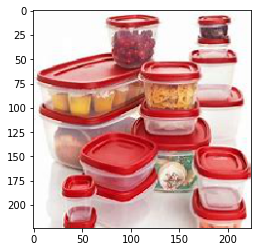

Sparkling_Water


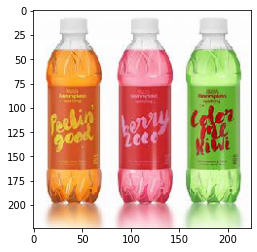

Pineapple


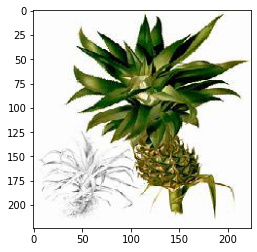

Knives


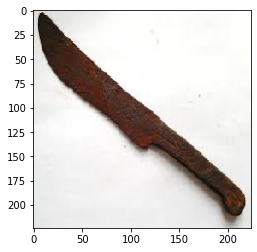

Knives


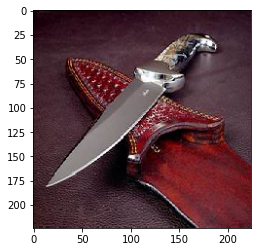

Party_Mix_snack


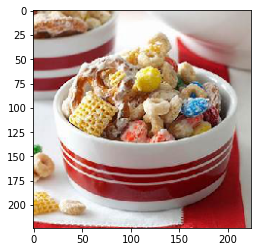

Sparkling_Water


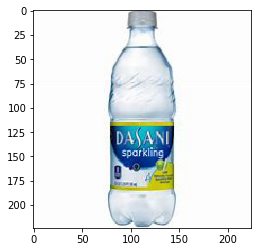

Pineapple


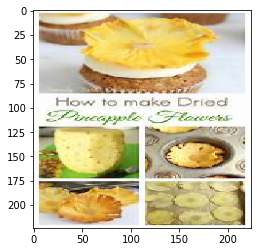

In [ ]:
n = 8
x,y = train_generator.next()
# x,y size is train_generator.batch_size

for i in range(0,n):
    image = x[i]
    label = y[i].argmax()  # categorical from one-hot-encoding
    print(dataset_labels[label])
    plt.imshow(image)
    plt.show()

##Training model

### AlexNet

In [ ]:
def AlexNet(input_shape, num_classes, regl2 = 0.0001, lr=0.0001):

    model = Sequential()

    # C1 Convolutional Layer 
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11),\
                     strides=(2,4), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())

    # C2 Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C3 Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C4 Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # C5 Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Flatten
    model.add(Flatten())

    flatten_shape = (input_shape[0]*input_shape[1]*input_shape[2],)
    
    # D1 Dense Layer
    model.add(Dense(4096, input_shape=flatten_shape, kernel_regularizer=regularizers.l2(regl2)))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # D2 Dense Layer
    model.add(Dense(4096, kernel_regularizer=regularizers.l2(regl2)))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # D3 Dense Layer
    model.add(Dense(1000,kernel_regularizer=regularizers.l2(regl2)))
    model.add(Activation('relu'))
    # Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    # Compile

    adam = optimizers.Adam(lr=lr)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model
 
# create the model
model = AlexNet(input_shape, train_generator.num_classes)
model.summary()

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps = np.ceil(test_generator.samples/test_generator.batch_size)
epochs = 10
history = model.fit(train_generator, epochs=epochs, verbose=1,\
                    steps_per_epoch=steps_per_epoch,\
                    validation_data=test_generator,\
                    validation_steps=val_steps)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 107, 54, 96)       34944     
_________________________________________________________________
activation (Activation)      (None, 107, 54, 96)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 53, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 17, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 43, 17, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 8, 256)        0

'\nsteps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)\nval_steps = np.ceil(test_generator.samples/test_generator.batch_size)\nepochs = 10\nhistory = model.fit(train_generator, epochs=epochs, verbose=1,                    steps_per_epoch=steps_per_epoch,                    validation_data=test_generator,                    validation_steps=val_steps)\n                    '

### VGG16

In [ ]:
# Load VGG16 model 
# init_weights='imagenet' if you want to use the pretrained model
def load_vgg16_features(input_shape, init_weights=None):
    
    # define input tensor
    input0 = Input(shape=input_shape)

    # load VGG16 model (possibly pretrained model on imagenet) without the final dense layers (include_top=False)
    vgg16_model = keras.applications.vgg16.VGG16(include_top=False, weights=init_weights, input_tensor=input0)
    
    feature_extractor = keras.models.Model(inputs=input0, outputs=vgg16_model.output, name="vgg16_features")

    optimizer = 'adam' #alternative 'sgd'

    feature_extractor.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return feature_extractor

vgg16feat_model = load_vgg16_features(input_shape)
vgg16feat_model.summary()

Model: "vgg16_features"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)    

In [ ]:
def transferNet(input_shape, num_classes, output_layer_name, trainable_layers):
    
    # load the pre-trained model
    feature_extractor = load_vgg16_features(input_shape, init_weights='imagenet')

    # get the original input layer tensor
    input_t = feature_extractor.get_layer(index=0).input

    # set the feature extractor layers as non-trainable
    for idx,layer in enumerate(feature_extractor.layers):
      if layer.name in trainable_layers:
        layer.trainable = True
      else:
        layer.trainable = False

    # get the output tensor from a layer of the feature extractor
    output_extractor = feature_extractor.get_layer(name = output_layer_name).output
    
    #output_extractor = MaxPooling2D(pool_size=(4,4))(output_extractor)

    # flat the output of a Conv layer
    flatten = Flatten()(output_extractor) 
    flatten_norm = BatchNormalization()(flatten)

    # add a Dense layer
    dense1 = Dropout(0.4)(flatten_norm)
    dense1 = Dense(200, activation='relu')(dense1)
    dense1 = BatchNormalization()(dense1)
    
    # add a Dense layer
    dense2 = Dropout(0.4)(dense1)
    dense2 = Dense(100, activation='relu')(dense2)
    dense2 = BatchNormalization()(dense2)

    # add the final output layer
    dense3 = BatchNormalization()(dense2)
    dense3 = Dense(num_classes, activation='softmax')(dense3)
    
    model = keras.models.Model(inputs=input_t, outputs=dense3, name="transferNet")
    
    optimizer = 'adam' #alternative 'SGD'
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return model

# choose the layer from which you can get the features (block5_pool the end, glob_pooling to get the pooled version of the output)
name_output_extractor = "block5_pool"
trainable_layers = ["block5_conv3"]

# build the transfer model
transfer_model = transferNet(input_shape, train_generator.num_classes, name_output_extractor, trainable_layers)
transfer_model.summary()

# fit the transferNet on the training data
stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
steps_per_epoch = np.ceil(train_generator.n/train_generator.batch_size)
val_steps = np.ceil(test_generator.n/test_generator.batch_size)
epochs = 10

transfer_history = transfer_model.fit(train_generator, epochs=epochs, verbose=1, callbacks=[stopping],\
                    steps_per_epoch=steps_per_epoch,\
                    validation_data=test_generator,\
                    validation_steps=val_steps)

Model: "transferNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       

"\n# fit the transferNet on the training data\nstopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=3)\nsteps_per_epoch = np.ceil(train_generator.n/train_generator.batch_size)\nval_steps = np.ceil(test_generator.n/test_generator.batch_size)\nepochs = 10\n\ntransfer_history = transfer_model.fit(train_generator, epochs=epochs, verbose=1, callbacks=[stopping],                    steps_per_epoch=steps_per_epoch,                    validation_data=test_generator,                    validation_steps=val_steps)"

### MobileNet v2

In [ ]:
model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.build((None,) + input_shape)
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss = 'categorical_crossentropy',
metrics = ['accuracy'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(test_generator.samples/test_generator.batch_size)

hist = model.fit(
train_generator,
epochs = 10,
verbose = 1,
steps_per_epoch = steps_per_epoch,
validation_data = test_generator,
validation_steps = val_steps_per_epoch).history

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_12 (KerasLayer)  (None, 1280)              2257984   
_________________________________________________________________
dropout_51 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 8)                 10248     
Total params: 2,268,232
Trainable params: 10,248
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/10
198/198 [==============================] - 22s 109ms/step - loss: 0.9231 - accuracy: 0.6854 - val_loss: 0.4064 - val_accuracy: 0.8760
Epoch 2/10
198/198 [==============================] - 21s 108ms/step - loss: 0.5327 - accuracy: 0.8162 - val_loss: 0.3542 - val_accuracy: 0.8887
Epoch 3/10
198/198 [==============================] - 21s 107ms/step - loss: 0

## Exporting model

In [ ]:
#save .h5 
#model.save('/content/drive/MyDrive/Machine Learning/model_alexnet.h5')
transfer_model.save('/content/drive/MyDrive/Machine Learning/model_vgg16.h5')
#model.save('/content/drive/MyDrive/Machine Learning/model_mobilenet.h5')

print('model saved')

model saved


## Re-load model

In [ ]:
#load .h5
#model = keras.models.load_model('/content/drive/MyDrive/Machine Learning/model_alexnet.h5')
#model = keras.models.load_model('/content/drive/MyDrive/Machine Learning/model_vgg16.h5')
model = keras.models.load_model('/content/drive/MyDrive/Machine Learning/model_mobilenet.h5', custom_objects={'KerasLayer': hub.KerasLayer})

print('model loaded')

model loaded


##Testing model

In [ ]:
val_steps=test_generator.n//test_generator.batch_size+1

preds = model.predict_generator(test_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes  # shuffle=False in test_generator

cm = confusion_matrix(Ytest, Ypred)

conf = [] # data structure for confusions: list of (i,j,cm[i][j])
for i in range(0,cm.shape[0]):
  for j in range(0,cm.shape[1]):
    if (i!=j and cm[i][j]>0):
      conf.append([i,j,cm[i][j]])

col=2
conf = np.array(conf)
conf = conf[np.argsort(-conf[:,col])]  # decreasing order by 3-rd column (i.e., cm[i][j])

print('%-16s     %-16s  \t\t%s \t%s ' %('True','Predicted','errors','err %'))
print('------------------------------------------------------------------')
for k in conf:
  if(dataset_labels[k[0]] == 'plastic_food_container' or dataset_labels[k[1]] == 'plastic_food_container'):
    print('%-16s ->  %-16s  \t%d \t%.2f %% ' %(dataset_labels[k[0]],dataset_labels[k[1]],k[2],k[2]*100.0/test_generator.n))
  else:
    print('%-16s ->  %-16s  \t\t%d \t%.2f %% ' %(dataset_labels[k[0]],dataset_labels[k[1]],k[2],k[2]*100.0/test_generator.n))

50/50 [==============================] - 4s 77ms/step
True                 Predicted         		errors 	err % 
------------------------------------------------------------------
plastic_food_container ->  Caddies           	23 	1.46 % 
Jams             ->  Caddies           		23 	1.46 % 
Jams             ->  Sparkling_Water   		12 	0.76 % 
Caddies          ->  Sparkling_Water   		11 	0.70 % 
Jams             ->  Knives            		9 	0.57 % 
Caddies          ->  Jams              		8 	0.51 % 
Knives           ->  Caddies           		7 	0.45 % 
Sparkling_Water  ->  Jams              		6 	0.38 % 
Caddies          ->  Knives            		5 	0.32 % 
buillin_cup      ->  Jams              		5 	0.32 % 
buillin_cup      ->  plastic_food_container  	4 	0.25 % 
Caddies          ->  plastic_food_container  	4 	0.25 % 
Pineapple        ->  Party_Mix_snack   		4 	0.25 % 
plastic_food_container ->  Party_Mix_snack   	3 	0.19 % 
Knives           ->  Jams              		3 	0.19 % 
plastic_food_contai

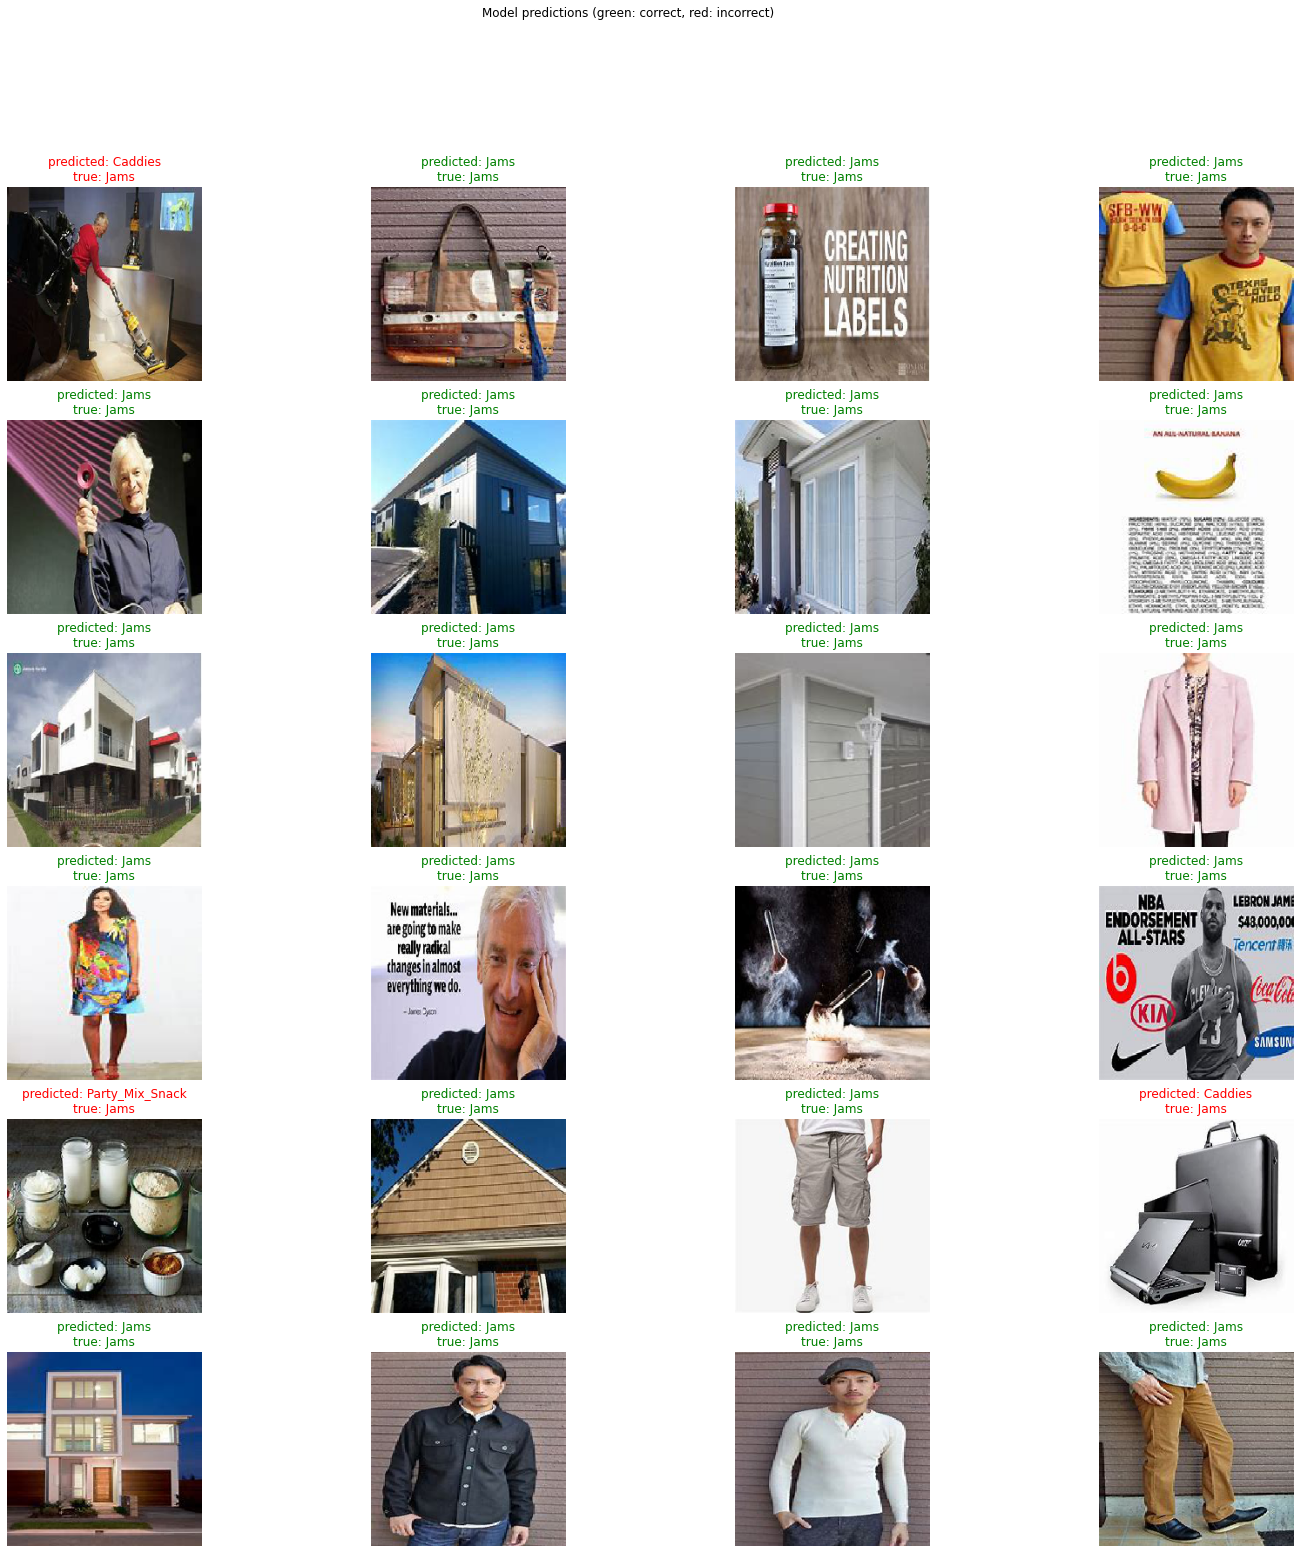

In [ ]:
val_image_batch, val_label_batch = next(iter(test_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels

val_steps = np.ceil(test_generator.samples/test_generator.batch_size)

predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(25,25))
plt.subplots_adjust(hspace=0.2)
for n in range(24):
  plt.subplot(6,4,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title("predicted: "+predicted_labels[n].title()+"\ntrue: "+dataset_labels[true_label_ids[n]].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")